In [1]:
# %%script false --no-raise-error
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# show all rows/columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.1f' % x) #print float as int



_df = pd.read_csv("en.openfoodfacts.org.products.tsv", error_bad_lines=False, sep='\t', low_memory=False, nrows = None)
print("✅ Setup complete.")

✅ Setup complete.


In [2]:
from tools import *
#le dataframe est copié pour le garder comme base de travail et on lui ajoute des méthodes à travers notre classe Table
df = Table(_df.copy())

# Exploration des données

In [3]:
# %%script false --no-raise-error
md(f"lignes : {df.shape[0]}")
md(f"colonnes : {df.shape[1]}")

cols = []
for col in df:
    size = df[col].size
    size_notna = df[col].notna().sum()
    serie = df[col]
    col = {
        "name": col,
        "dtype": serie.dtype,
        "NaN / size" : get_value_with_perc(size, serie.isna().sum()),
        "unique / not NaN" : get_value_with_perc(size_notna, len(serie.unique().tolist())),
        "values" : str(serie.value_counts().index.to_list()[:10])
    }
    cols.append(col)
    
infos = pd.DataFrame(data = cols)
display(infos)    

lignes : 356027

colonnes : 163

,name,dtype,NaN / size,unique / not NaN,values
0,code,object,26/356027 (0.01%),356002/356001 (100.0%),"['3367940000628', '0011110823496', '3250390638..."
1,url,object,26/356027 (0.01%),356002/356001 (100.0%),['http://world-en.openfoodfacts.org/product/35...
2,creator,object,3/356027 (0.0%),3891/356024 (1.09%),"['usda-ndb-import', 'openfoodfacts-contributor..."
3,created_t,object,3/356027 (0.0%),224752/356024 (63.13%),"['1489055829', '1489077120', '1489050353', '14..."
4,created_datetime,object,10/356027 (0.0%),224753/356017 (63.13%),"['2017-03-09T16:32:00Z', '2017-03-09T10:37:09Z..."
5,last_modified_t,object,0/356027 (0.0%),216836/356027 (60.9%),"['1439141742', '1439141747', '1439141735', '14..."
6,last_modified_datetime,object,0/356027 (0.0%),216836/356027 (60.9%),"['2015-08-09T17:35:42Z', '2015-08-09T17:35:47Z..."
7,product_name,object,17512/356027 (4.92%),249246/338515 (73.63%),"['Ice Cream', 'Extra Virgin Olive Oil', 'Potat..."
8,generic_name,object,298313/356027 (83.79%),42452/57714 (73.56%),['Pâtes alimentaires au blé dur de qualité sup...
9,quantity,object,236742/356027 (66.5%),15564/119285 (13.05%),"['500 g', '200 g', '250 g', '100 g', '400 g', ..."


In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

In [5]:
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.0,283867.0,0.0,283867.0,0.0,0.0,295367.0,869.0,279497.0,263823.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0,1.0,27.0,26.0,0.0,0.0,1.0,0.0,23040.0,23075.0,938.0,201.0,43.0,89.0,207.0,159.0,9.0,27.0,26.0,25.0,15.0,0.0,16.0,0.0,0.0,0.0,143443.0,144170.0,279220.0,279186.0,85.0,32.0,44.0,278.0,6.0,11.0,291.0,451.0,220683.0,294161.0,29.0,17.0,9.0,289739.0,289694.0,4577.0,137706.0,35.0,7207.0,1472.0,930.0,141060.0,11277.0,10925.0,11831.0,6897.0,5330.0,3046.0,5390.0,331.0,2551.0,73.0,99.0,24848.0,198.0,141517.0,5938.0,140660.0,6392.0,3964.0,2122.0,1639.0,99.0,1181.0,23.0,20.0,288.0,91.0,33.0,52.0,3228.0,404.0,182.0,1383.0,0.0,278.0,254856.0,254856.0,0.0,0.0
mean,NaN,1.9,0.0,NaN,0.1,NaN,NaN,1125.5,587.2,56065.9,5.1,NaN,NaN,7.4,6.0,36.1,18.9,8.1,3.0,10.4,10.3,NaN,NaN,61.0,NaN,10.5,6.4,3.5,2.2,2.8,1.6,18.7,12.5,0.1,0.2,0.1,41.2,26.1,NaN,0.0,NaN,NaN,NaN,0.1,0.0,56140.2,15.7,12.8,2.9,24.8,6.0,17.1,12.2,30.9,49.1,384346.7,53266.0,4.4,2.4,0.0,1.9,0.8,8.3,0.0,0.5,0.0,0.1,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.4,0.1,0.4,0.1,0.1,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,12.3,6.5,33.4,60.4,15.4,52.1,NaN,335.8,9.2,9.0,NaN,NaN
std,NaN,2.5,0.2,NaN,0.3,NaN,NaN,936.8,713.3,29633845.3,8.0,NaN,NaN,NaN,0.2,24.1,NaN,NaN,NaN,3.9,3.4,NaN,NaN,NaN,NaN,16.8,10.9,8.7,7.8,13.1,2.0,32.6,110.9,0.0,0.0,0.0,25.1,25.5,NaN,0.0,NaN,NaN,NaN,1.5,0.4,29648540.7,22.0,15.2,5.9,29.3,14.0,17.8,8.4,24.8,33.1,180552853.3,28885775.9,3.0,2.2,0.0,120.5,47.5,11.0,0.1,2.5,0.0,0.7,1.0,2.2,2.6,1.3,0.3,1.7,0.3,5.1,0.0,0.0,1.5,1.4,0.2,12.5,0.1,3.3,12.0,0.2,13.4,0.1,0.9,0.0,0.1,0.1,0.0,0.0,0.0,7.7,69.6,2.0,32.9,29.3,3.7,19.0,NaN,423.2,9.0,9.2,NaN,NaN
min,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,7.4,5.9,0.0,18.9,8.1,3.0,0.1,5.2,NaN,NaN,61.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.0,1.0,1.1,NaN,0.0,NaN,NaN,NaN,-3.6,0.0,0.0,-17.9,0.0,0.0,0.0,0.0,0.1,1.5,0.0,0.0,-6.7,-800.0,0.7,0.3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-6.9,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,NaN,0.0,-15.0,-15.0

# Correction des données

In [6]:
md("**Filtre produit français**")

df["is_french"] = df.apply(is_french, axis = 1)
print("nombre de produits français :", df["is_french"].sum())
df.drop(df[df.is_french == False].index, inplace = True) 
print("Done! Nombre de lignes : ", df.shape[0])

**Filtre produit français**

nombre de produits français : 130573
Done! Nombre de lignes :  130573


In [7]:
cols = ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'image_url', 'image_small_url']
md(f"**Suppression des colonnes inutiles : {cols}**")
df.remove_cols(cols)

**Suppression des colonnes inutiles : ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'image_url', 'image_small_url']**

colonnes : 164
Done. colonnes : 155


In [8]:
md(f"**Suppression des lignes dupliquées**")
df.remove_duplicated_rows()

**Suppression des lignes dupliquées**

5270/130573 lignes dupliquées.
Done. 125303 lignes maintenant


In [9]:
md(f"**Suppression des colonnes vides**")
df.remove_empty_cols()

**Suppression des colonnes vides**

['no_nutriments', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-melissic-acid_100g', '-elaidic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', 'water-hardness_100g']
colonnes : 155
Done. colonnes : 134


In [10]:
#ça peut prendre un moment...
md(f"**Correction de l'encodage**")
# df.fix_encoding()
md("Done! logs at fix_encoding.txt")

**Correction de l'encodage**

Done! logs at fix_encoding.txt

In [11]:
md("Assigner la valeur NaN à toutes les valeurs null (espace, unknown...)")
df.empty_to_nan()

Assigner la valeur NaN à toutes les valeurs null (espace, unknown...)

empty_to_nan
nan values :  12471222
nan values :  12471236


In [12]:
md("Fusion des colonnes proches (categories, categorie_tags...)")
df.copy_value_from_child()

Fusion des colonnes proches (categories, categorie_tags...)

In [13]:
md("Correction des valeurs eronnées des apports alimentaires")
df.fix_composition_values()
df["sodium_100g"] = df.apply(fix_sodium, axis = 1)

Correction des valeurs eronnées des apports alimentaires

supression de 1 valeurs abérrantes sur la colonne fat_100g
supression de 8 valeurs abérrantes sur la colonne carbohydrates_100g
supression de 2 valeurs abérrantes sur la colonne sugars_100g
supression de 10 valeurs abérrantes sur la colonne fiber_100g
supression de 1 valeurs abérrantes sur la colonne proteins_100g
supression de 1 valeurs abérrantes sur la colonne salt_100g
supression de 1 valeurs abérrantes sur la colonne vitamin-b1_100g
supression de 11 valeurs abérrantes sur la colonne pantothenic-acid_100g
supression de 2 valeurs abérrantes sur la colonne calcium_100g
supression de 1 valeurs abérrantes sur la colonne taurine_100g
fix sodium
fix sodium
fix sodium
fix sodium


In [14]:
md("Génération du rapport")
# profile = ProfileReport(df, title='fixed DF', minimal=True)
# profile.to_file("fixed.html")
md("Done! Comparer old.html et fixed.html")

Génération du rapport

Done! Comparer old.html et fixed.html

# Energy

<AxesSubplot:xlabel='energy_100g'>

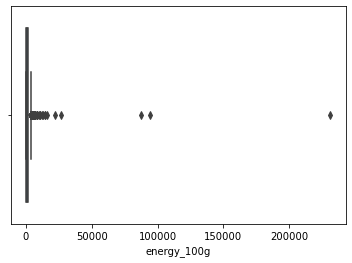

In [15]:
sns.boxplot(x=_df["energy_100g"])

<AxesSubplot:xlabel='energy_100g'>

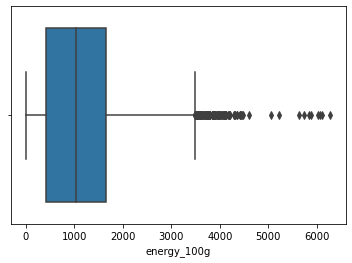

In [16]:
sns.boxplot(x=df["energy_100g"])

# Fat

<AxesSubplot:xlabel='fat_100g'>

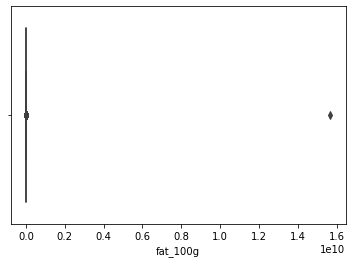

In [17]:
sns.boxplot(x=_df["fat_100g"])

<AxesSubplot:xlabel='fat_100g'>

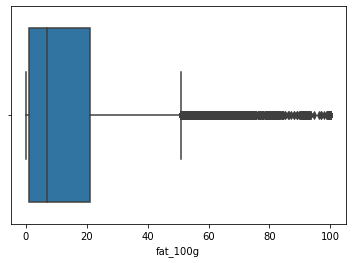

In [18]:
sns.boxplot(x=df["fat_100g"])

# Carbs

<AxesSubplot:xlabel='carbohydrates_100g'>

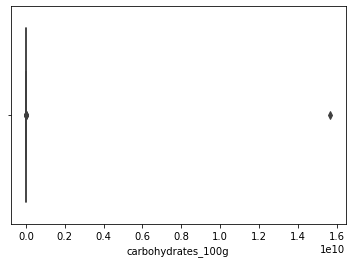

In [19]:
sns.boxplot(x=_df["carbohydrates_100g"])

<AxesSubplot:xlabel='carbohydrates_100g'>

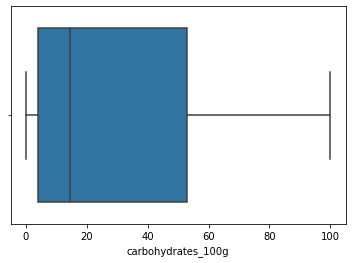

In [20]:
sns.boxplot(x=df["carbohydrates_100g"])

# Prots

<AxesSubplot:xlabel='proteins_100g'>

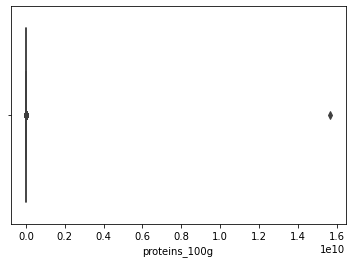

In [21]:
sns.boxplot(x=_df["proteins_100g"])

<AxesSubplot:xlabel='proteins_100g'>

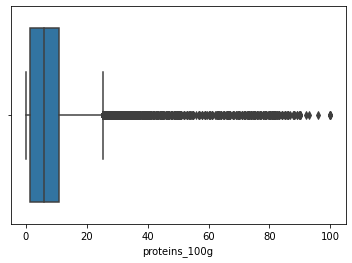

In [22]:
sns.boxplot(x=df["proteins_100g"])

In [23]:
# Nouvelle exploration

In [24]:
md(f"lignes : {df.shape[0]}")
md(f"colonnes : {df.shape[1]}")

cols = []
for col in df:
    size = df[col].size
    size_notna = df[col].notna().sum()
    serie = df[col]
    col = {
        "name": col,
        "dtype": serie.dtype,
        "NaN / size" : get_value_with_perc(size, serie.isna().sum()),
        "unique / not NaN" : get_value_with_perc(size_notna, len(serie.unique().tolist())),
        "values" : str(serie.value_counts().index.to_list()[:10])
    }
    cols.append(col)
    
infos = pd.DataFrame(data = cols)
display(infos)  

lignes : 125303

colonnes : 135

,name,dtype,NaN / size,unique / not NaN,values
0,product_name,object,1204/125303 (0.96%),100534/124099 (81.01%),"[""Huile d'olive vierge extra"", 'Mayonnaise', '..."
1,generic_name,object,82941/125303 (66.19%),30438/42362 (71.85%),['Pâtes alimentaires au blé dur de qualité sup...
2,quantity,object,42101/125303 (33.6%),11218/83202 (13.48%),"['500 g', '200 g', '250 g', '100 g', '300 g', ..."
3,packaging,object,56169/125303 (44.83%),12846/69134 (18.58%),"['Sachet,Plastique', 'Carton', 'Plastique', 'B..."
4,packaging_tags,object,56170/125303 (44.83%),10438/69133 (15.1%),"['sachet,plastique', 'plastique', 'carton', 'b..."
5,brands,object,6868/125303 (5.48%),28895/118435 (24.4%),"['Carrefour', 'Auchan', 'U', 'Casino', 'Leader..."
6,brands_tags,object,6882/125303 (5.49%),22599/118421 (19.08%),"['carrefour', 'auchan', 'u', 'leader-price', '..."
7,categories,object,47385/125303 (37.82%),31952/77918 (41.01%),"['en:beverages', 'en:fats', 'en:milks', 'Snack..."
8,categories_tags,object,47383/125303 (37.81%),18354/77920 (23.55%),"['en:beverages,en:non-sugared-beverages', 'en:..."
9,categories_en,object,47383/125303 (37.81%),18357/77920 (23.56%),"['Beverages,Non-sugared beverages', 'Fats', 'S..."
